In [1]:
import pandas as pd
from datasets import load_dataset

import mplcairo
import matplotlib as mpl
mpl.use("module://mplcairo.qt")
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

from klpt.preprocess import Preprocess
from tldextract import extract

%matplotlib inline

In [2]:
dataset = load_dataset("oscar-corpus/OSCAR-2201", 'ckb', split='train',  use_auth_token=True)

Reusing dataset oscar-2201 (/home/razhan/.cache/huggingface/datasets/oscar-corpus___oscar-2201/ckb/2022.1.0/032fd79dd466742c21a0313683c79c2489cf263a06fef03f80453e9a227500da)


In [3]:
print(f"There are {dataset.num_rows} rows in the corpus")

There are 84950 rows in the corpus


In [4]:
df = dataset.to_pandas()
df.head()

,id,text,meta
0,0,له‌ ئێستادا سناپ چات یه‌كێكه‌ له‌ پڕ به‌كارهێن...,{'warc_headers': {'warc-record-id': '<urn:uuid...
1,1,بەڕێوەبەری گشتیی بانكە بازرگانییەكانی هەرێم را...,{'warc_headers': {'warc-record-id': '<urn:uuid...
2,2,په‌رله‌مانی‌ توركیا له‌دانیشتنێكدا كه‌ ئه‌مڕۆ ...,{'warc_headers': {'warc-record-id': '<urn:uuid...
3,3,ڕۆژنامەی گاردیەن و گۆڤاری شەڕە ئاسمانییەکان ڕا...,{'warc_headers': {'warc-record-id': '<urn:uuid...
4,4,ئەم تاڤگەیە دەکەوێتە گوندی ئاشی بێ کۆر سەر بە ...,{'warc_headers': {'warc-record-id': '<urn:uuid...


# Meta Analysis

In [6]:
df_warc = df['meta'].apply(pd.Series)['warc_headers'].apply(pd.Series)

In [7]:
df_warc.head()

,warc-record-id,warc-date,content-type,content-length,warc-type,warc-identified-content-language,warc-refers-to,warc-target-uri,warc-block-digest
0,<urn:uuid:3b1833c6-efcc-4698-8420-d7095d6d1a26>,2021-11-28T11:31:24Z,text/plain,7996,conversion,"kur,eng",<urn:uuid:d3f055cb-3d11-4c7a-9087-a3683398d8c7>,http://techeye.org/browse/22240,sha1:JX4SX73POS3EA6LICPUZPRAVGAUKADNH
1,<urn:uuid:62c524dc-d1a8-4ea8-9c0f-719e96fcc745>,2021-11-29T05:59:50Z,text/plain,8473,conversion,kur,<urn:uuid:33ed7d89-c401-4bc0-967d-63b91d899f7e>,https://archive.sbeiy.com/(X(1)S(b5zqey2h4lowk...,sha1:NB5ISMEYHORCKOUOJ2U5REMWWYERSG5O
2,<urn:uuid:66c6d7d7-b1d8-4bdc-a4f8-9320cc4d928d>,2021-11-29T06:26:29Z,text/plain,6938,conversion,"kur,eng",<urn:uuid:3de8a5d0-57c5-4a0e-9c15-b1b52ab01bb7>,https://archive4.sbeiy.com/?p=55985,sha1:CLZ3E4WXLPIDWGMWT772HM4VXO3Z2Q3D
3,<urn:uuid:a5f5553a-78da-474f-9284-80e020308c4e>,2021-11-29T05:16:40Z,text/plain,4184,conversion,"kur,eng",<urn:uuid:37d8a9be-89c5-40bb-ab52-1aa4988b4b98>,https://ku.mehrnews.com/news/36677/%DA%98%DB%8...,sha1:SQKW6YH5JXMFOXRU3R37EFXYIBPIIBLT
4,<urn:uuid:43c6edd1-60bf-48dc-b7d7-6d355127afef>,2021-11-29T06:02:14Z,text/plain,1093,conversion,kur,<urn:uuid:03c057c6-3bf1-40f5-8de5-9a51e5f7e319>,https://kurdzone.net/Topic_3531_16,sha1:EUZT7AQLAD2X3K3GGR3WAJ5JMMACDFRB


In [8]:
# df.website = df_warc['warc-target-uri'].str.lower().str.extract('://([\w\-\.]+)', expand=False)
# This extraction is only based on domain names. it assumes any subdomain like ckb or www to be the same
df.website = df_warc['warc-target-uri'].str.lower().apply(lambda x: ''.join(extract(x).domain+ '.'+ extract(x).suffix)  )                                 

/tmp/ipykernel_178699/3895907809.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.website = df_warc['warc-target-uri'].str.lower().apply(lambda x: ''.join(extract(x).domain+ '.'+ extract(x).suffix)  )


In [9]:
no_websites = df.website.value_counts().count()
print(f"Number of sources OSCAR got their data from: {no_websites}")

Number of sources OSCAR got their data from: 873


In [10]:
df.website.sort_values(inplace=True)
df_website = df.website.value_counts().rename_axis('website').reset_index(name='counts')
df_website.head(15)

,website,counts
0,nasnews.com,9030
1,wikipedia.org,8159
2,mehrnews.com,3202
3,khaktv.net,1880
4,xelk.org,1876
5,kurditgroup.org,1863
6,kitn.net,1729
7,wtarikurd.info,1568
8,forvo.com,1558
9,nrttv.com,1552


In [11]:
# To make sure we didn't miss any website the sum of the counts column should be 84950
df_website.counts.sum() == 84950

True

In [174]:
# Websites hat have a 1000 or more records in the corpus
df_website[df_website.counts >= 1000]

,website,counts
0,nasnews.com,9030
1,wikipedia.org,8159
2,mehrnews.com,3202
3,khaktv.net,1880
4,xelk.org,1876
5,kurditgroup.org,1863
6,kitn.net,1729
7,wtarikurd.info,1568
8,forvo.com,1558
9,nrttv.com,1552


In [57]:
# Websites that have a 1000 or more records in the corpus
df_website[df_website.counts >= 1000]

,website,counts
0,nasnews.com,9030
1,wikipedia.org,8159
2,mehrnews.com,3202
3,khaktv.net,1880
4,xelk.org,1876
5,kurditgroup.org,1863
6,kitn.net,1729
7,wtarikurd.info,1568
8,forvo.com,1558
9,nrttv.com,1552


In [60]:
fig = px.bar(df_website[df_website.counts >= 1000], x="counts", y="website", title='Websites that have a 1000 or more records in the corpus', orientation='h', 
             width=700, height=700,color='website')
fig.show()

In [61]:
fig = px.treemap(df_website[df_website.counts >= 1000], path=['website'], values='counts',title='Tree of websites with 1000+ records in the corpus')
fig.show()

# Text Analysis

In [5]:
preprocessor_ckb = Preprocess("Sorani", "Arabic", numeral="Latin")

In [6]:
df.text = df.text.apply(preprocessor_ckb.preprocess)

In [ ]:
# without preprocessing there were ~1.3M tokens most of them لە or بە

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84950 entries, 0 to 84949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      84950 non-null  int64 
 1   text    84950 non-null  object
 2   meta    84950 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [9]:
df.text = df.text.astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84950 entries, 0 to 84949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      84950 non-null  int64 
 1   text    84950 non-null  object
 2   meta    84950 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [11]:
df.text.describe()

count                                                 84950
unique                                                65024
top       دەق لەژێر Creative Commons Attribution-ShareAl...
freq                                                   4049
Name: text, dtype: object

In [12]:
# Number of duplicates 
df.text.duplicated().sum()

19926

In [13]:
# Showing duplicated
text = df["text"]
duplicated_text = df[text.isin(text[text.duplicated()])].sort_values("text")
duplicated_text.head(10)

,id,text,meta
64277,64277,! برای بەڕێزم بەردە گیان ئەو دالەی کە خاڵی لە ...,{'warc_headers': {'warc-record-id': '<urn:uuid...
72416,72416,! برای بەڕێزم بەردە گیان ئەو دالەی کە خاڵی لە ...,{'warc_headers': {'warc-record-id': '<urn:uuid...
8224,8224,""" ئەگەر دەستوری هەرێمی کوردستان بۆ ماوەیەکی دو...",{'warc_headers': {'warc-record-id': '<urn:uuid...
42426,42426,""" ئەگەر دەستوری هەرێمی کوردستان بۆ ماوەیەکی دو...",{'warc_headers': {'warc-record-id': '<urn:uuid...
64269,64269,"""ئێمە هیوامان وایە لە شوێنەکانی خۆمان قەرەبووم...",{'warc_headers': {'warc-record-id': '<urn:uuid...
2190,2190,"""ئێمە هیوامان وایە لە شوێنەکانی خۆمان قەرەبووم...",{'warc_headers': {'warc-record-id': '<urn:uuid...
64115,64115,"""ئێمە هیوامان وایە لە شوێنەکانی خۆمان قەرەبووم...",{'warc_headers': {'warc-record-id': '<urn:uuid...
59462,59462,"""ئێمە هیوامان وایە لە شوێنەکانی خۆمان قەرەبووم...",{'warc_headers': {'warc-record-id': '<urn:uuid...
11326,11326,"""ئێمە هیوامان وایە لە شوێنەکانی خۆمان قەرەبووم...",{'warc_headers': {'warc-record-id': '<urn:uuid...
47722,47722,"""ئێمە هیوامان وایە لە شوێنەکانی خۆمان قەرەبووم...",{'warc_headers': {'warc-record-id': '<urn:uuid...


In [14]:
df.text = df.text.astype(str)

In [15]:
df.drop_duplicates('text', inplace=True)

In [16]:
print(f"The dataset contains {df.shape[0]} rows after removing duplicates")

The dataset contains 65024 rows after removing duplicates


In [128]:
font_file = "/home/razhan/.local/share/fonts/KHejar.ttf"

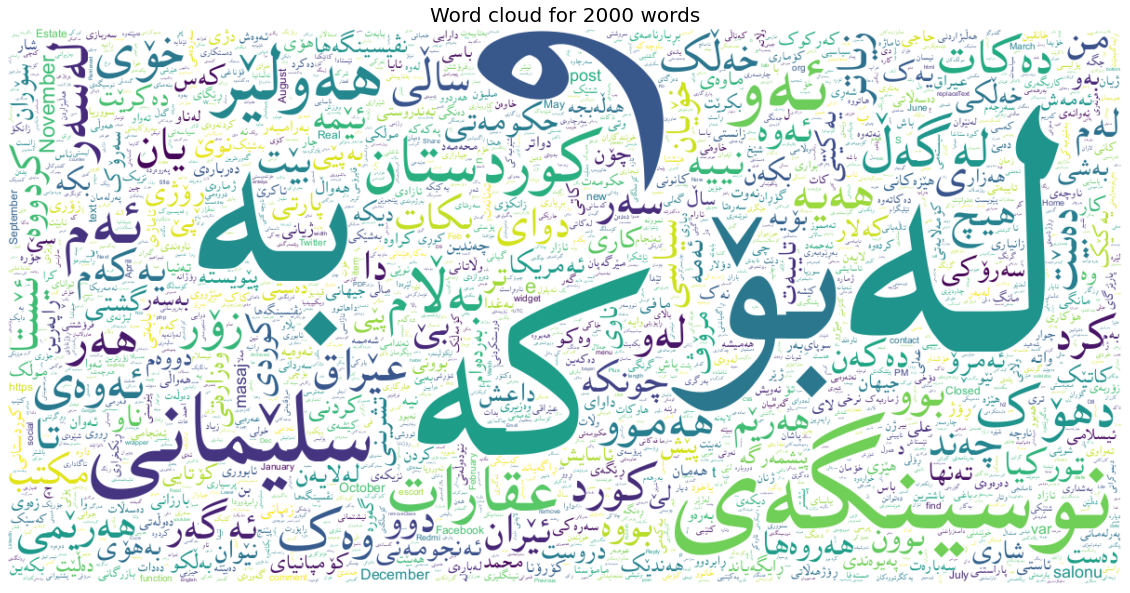

In [129]:
data = df.text
data_string = ' '.join(data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600, collocations = False, background_color="white", font_path=font_file).generate(data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for 2000 words',fontsize = 20)
plt.show()

In [130]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

corpus = get_corpus(df.text)
corpus[:5]


['لە', 'ئێستادا', 'سناپ', 'چات', 'یەکێکە']

In [131]:
from collections import Counter

counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common, columns=["corpus", "countv"])
most_common

,corpus,countv
0,و,1863093
1,لە,1364592
2,بە,660094
3,بۆ,534320
4,کە,526672
5,ئەو,276515
6,•,211724
7,ئەم,177129
8,کوردستان,125603
9,لەسەر,115875


In [30]:
count = df['text'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

10 words:       13
100 words:     157
1000 words:     11
1001 words:      8
1002 words:     11
              ... 
9953 words:      1
996 words:      12
997 words:      11
998 words:      14
999 words:      22
Name: text, Length: 3773, dtype: int64

In [31]:
print(f"On average the rows contain {count.mean()} words")

On average the rows contain 17.234031274847602 words
